In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from si_prefix import si_format
import mc_helper

In [2]:
n_bits = 7
mc_simulations = {}
results_dir = "ieee_DAC/bias_current_test_results/"

for filename in os.listdir(results_dir):
    df = pd.read_csv(os.path.join(results_dir, filename), delimiter = "\s+")
    # print(filename)
    _, _, run_id, current_level_str = filename.split("_")
    current_level = float(current_level_str[:-4])
    # print(run_id, current_level)
    if current_level not in mc_simulations.keys():
        mc_simulations[current_level] = []
    # print(df.head(3))

    df["code"] = df["v0"] * 0 # init column to all 0s
    for bit in range(n_bits):
        df["code"] = df["code"] + (df[f"v{bit}"] > .5*df["vdd"]) * 2 ** (n_bits - bit - 1)
        df.drop(f"v{bit}", axis = "columns", inplace = True)
    df.rename({"i(viout)": "Iout"}, axis = "columns", inplace = True)
    # print(df.head(10))

    mc_simulations[current_level].append(df)
    # mc_simulations.append(df)
# print(mc_simulations)
print(mc_simulations.keys())
print(mc_simulations[6.4e-9])

ValueError: not enough values to unpack (expected 4, got 2)

max error 1.0071687454837994e-10
max error 9.34589220540532e-11
max error 9.928031278742623e-11
max error 1.1983255951590146e-10
max error 1.0253986606671026e-10
max error 1.0738444445925957e-10
max error 1.1588150228510906e-10
max error 1.2655309139603774e-10
max error 1.2102372960949334e-10
max error 1.1688165361833266e-10
max error 1.177520602539552e-10
max error 9.507802528193855e-11


/home/madvlsi/dev/git/7-bit-D-A-converter-MP4-MADVLSI/schematics/simulations/mc_helper.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/7-bit-D-A-converter-MP4-MADVLSI/schematics/simulations/mc_helper.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


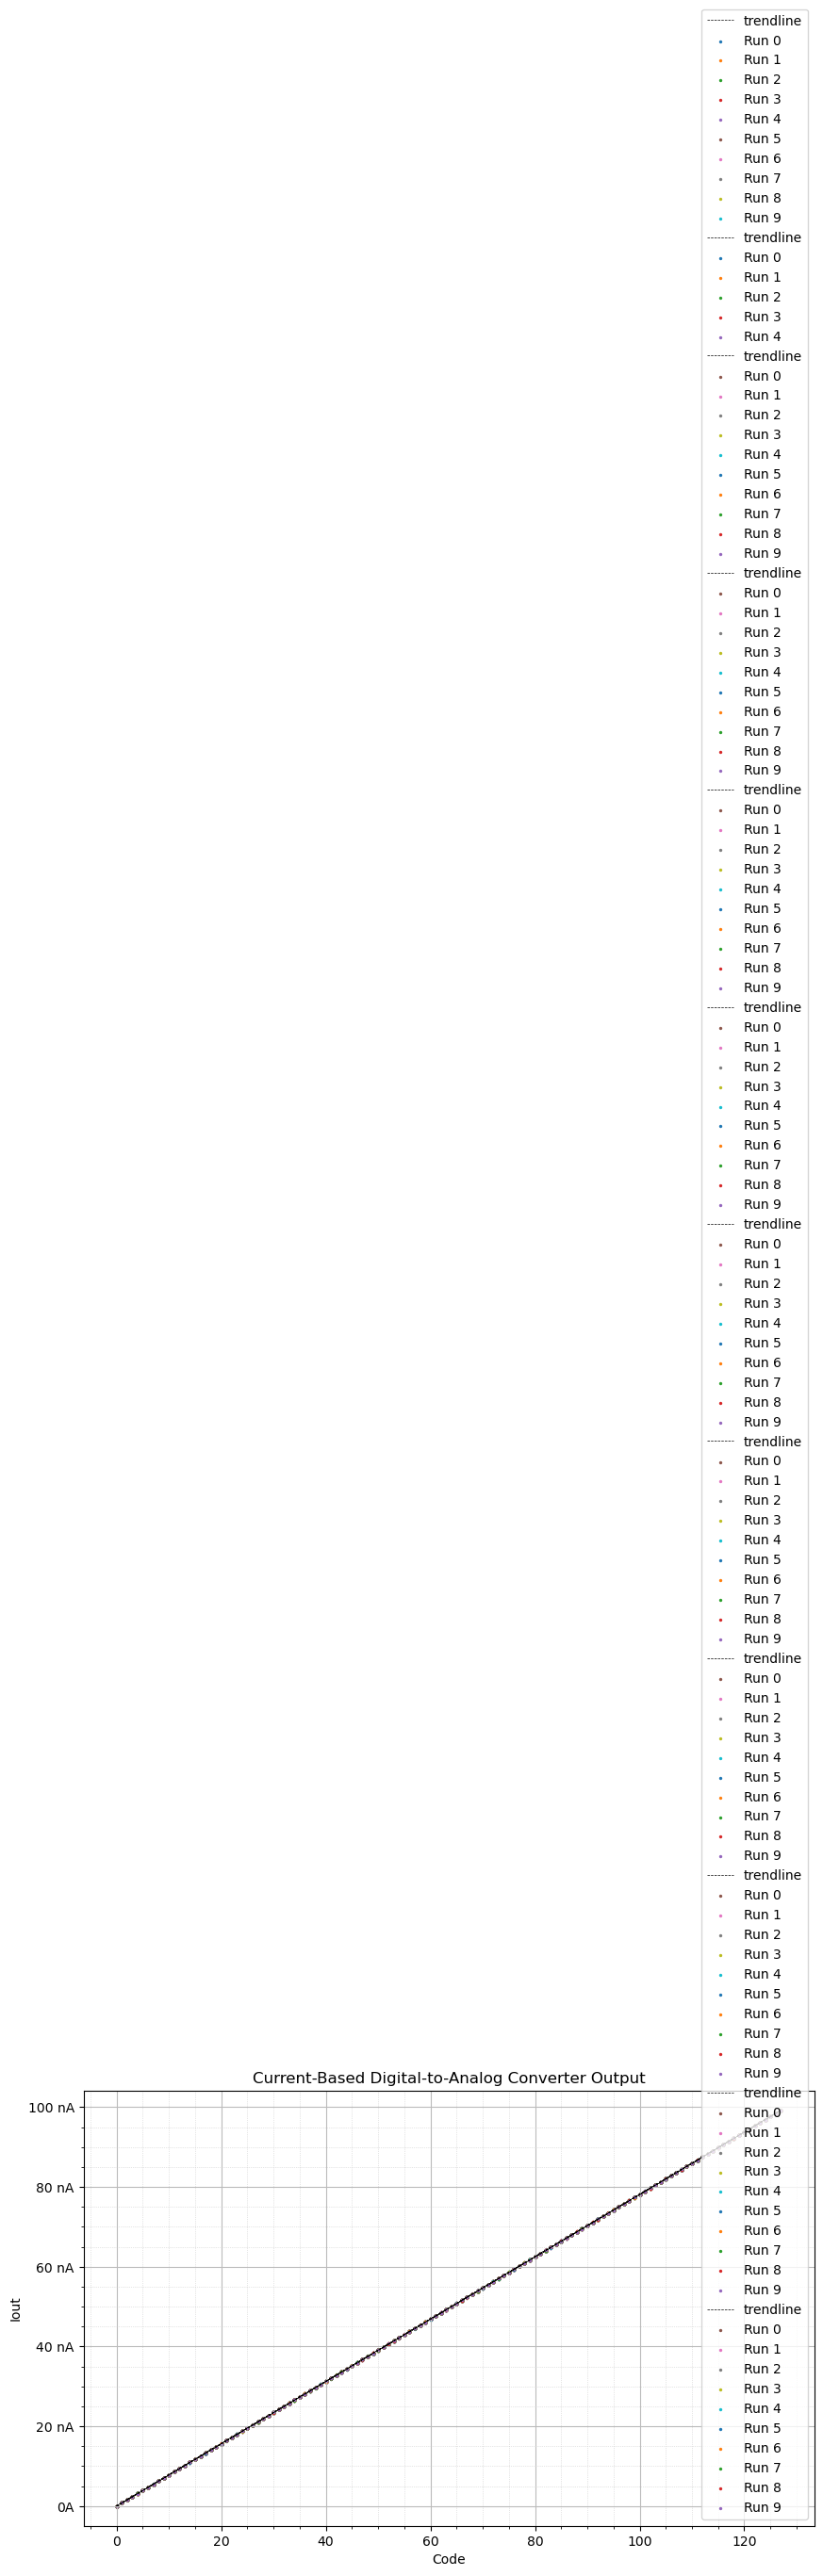

In [ ]:
plt.figure(figsize = (10, 6))

for current_level in mc_simulations.keys():
    df = mc_simulations[current_level]
    tdf = pd.concat(df)
    mc_helper.axes_labels("Code", "", "Iout", "A", "Current-Based Digital-to-Analog Converter Output")
    mc_helper.make_grids()

    z = np.polyfit(tdf["code"], tdf["Iout"], 1)
    # print(z)
    p = np.poly1d(z)

    errors = np.subtract(p(tdf["code"]),tdf["Iout"])

    # print("max allowable error", np.mean( np.subtract( p(range(1,128)) ,p(range(0,127)) ) )/2 )
    print("max error",np.max(errors))
    # print("variance of error",np.max(errors))

    plt.plot(range(128),p(range(128)),"k--", label = "trendline", linewidth = .5)

    for i, df_simulation in enumerate(df):
        # plt.plot(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), linewidth = 1, label = f"Run {i}")
        plt.scatter(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), s = 2, label = f"Run {i}")
    plt.legend(loc = "lower right")